In [1]:
from utils import *
from fastai2.vision.widgets import *

In [2]:
key =  "251fba944da544f0879d186e6815d82d"

In [3]:
#doc(search_images_bing)

In [4]:
ims = search_images_bing(key, "maple leaf").attrgot("content_url")
len(ims)

150

In [5]:
leaf_types = "maple", "oak", "birch"
path = Path("leaves")

In [6]:
if not path.exists():
    path.mkdir()
for o in leaf_types:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    results = search_images_bing(key, f'{o} leaf')
    download_images(dest, urls=results.attrgot('content_url'))


 Download of https://www.friendsofthewildflowergarden.org/generaljpegs/Seasons/trees/buroakleaf1v.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p leaves/oak
$ cd leaves/oak
$ wget -c https://www.friendsofthewildflowergarden.org/generaljpegs/Seasons/trees/buroakleaf1v.jpg
$ tar xf buroakleaf1v.jpg
 And re-run your code once the download is successful


 Download of http://www.friendsofthewildflowergarden.org/generaljpegs/Seasons/trees/northpinoakleaf1v.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p leaves/oak
$ cd leaves/oak
$ wget -c http://www.friendsofthewildflowergarden.org/generaljpegs/Seasons/trees/northpinoakleaf1v.jpg
$ tar xf northpinoakleaf1v.jpg
 And re-run your code once the download is successful




 Download of http://www.friendsofthewildflowergarden.org/generaljpegs/Seasons/trees/birchfeafcomp252x8.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p leaves/birch
$ cd leaves/birch
$ wget -c http://www.friendsofthewildflowergarden.org/generaljpegs/Seasons/trees/birchfeafcomp252x8.jpg
$ tar xf birchfeafcomp252x8.jpg
 And re-run your code once the download is successful



In [7]:
fns = get_image_files(path)
fns

(#477) [Path('leaves/maple/00000007.JPG'),Path('leaves/maple/00000000.jpg'),Path('leaves/maple/00000002.jpg'),Path('leaves/maple/00000005.jpg'),Path('leaves/maple/00000003.jpeg'),Path('leaves/maple/00000006.jpg'),Path('leaves/maple/00000010.jpg'),Path('leaves/maple/00000001.jpg'),Path('leaves/maple/00000004.jpg'),Path('leaves/maple/00000012.jpg')...]

In [8]:
failed = verify_images(fns)
failed

/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:2860: UserWarning: image file could not be identified because WEBP support not installed
  warnings.warn(message)


(#7) [Path('leaves/maple/00000052.jpg'),Path('leaves/maple/00000118.jpg'),Path('leaves/oak/00000111.jpg'),Path('leaves/oak/00000128.jpg'),Path('leaves/oak/00000062.jpg'),Path('leaves/oak/00000123.jpg'),Path('leaves/birch/00000116.jpg')]

In [9]:
failed.map(Path.unlink)

(#7) [None,None,None,None,None,None,None]

In [10]:
leaves = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(vlid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)
dls = leaves.dataloaders(path)

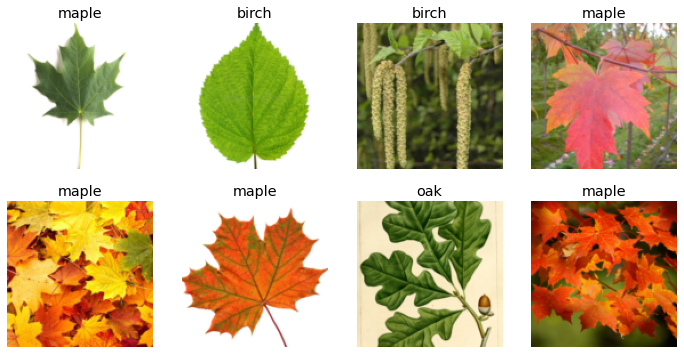

In [11]:
dls.valid.show_batch(max_n=8, nrows=2)

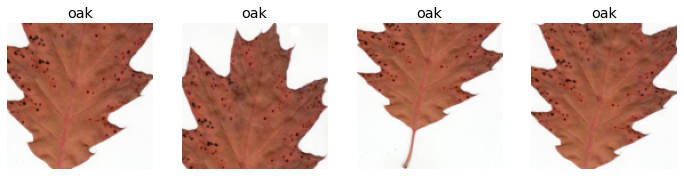

In [12]:
leaves.new(
    item_tfms=RandomResizedCrop(128, min_scale=0.3)
).dataloaders(path).train.show_batch(
    max_n=4, nrows=1, unique=True
)

In [13]:
leaves = leaves.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
           batch_tfms=aug_transforms()
          )
dls = leaves.dataloaders(path)

In [14]:
learner = cnn_learner(dls, resnet18, metrics=error_rate)
learner.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.838700,0.795511,0.340426,00:12


/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.711367,0.475619,0.159574,00:12
1,0.634143,0.342192,0.138298,00:12
2,0.491800,0.347245,0.106383,00:13
3,0.419296,0.336618,0.117021,00:13


/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/I

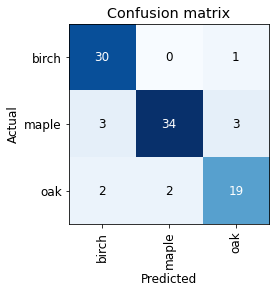

In [15]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix()

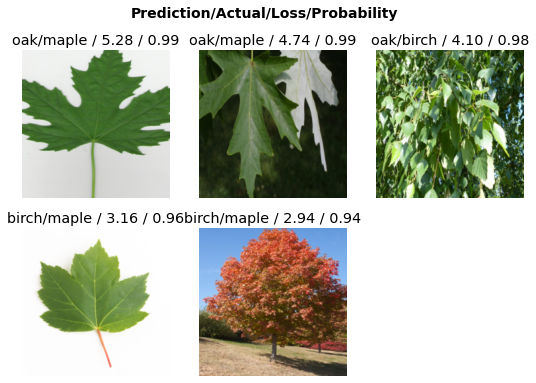

In [16]:
interp.plot_top_losses(5, nrows=2)

In [17]:
cleaner = ImageClassifierCleaner(learner)
cleaner

/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/opt/conda/envs/fastai/lib/python3.7/site-packages/PIL/I

In [18]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [21]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('leaves.pkl')]

In [22]:
learner_inf = load_learner(path/'leaves.pkl')

In [23]:
learner_inf.dls.vocab

(#3) ['birch','maple','oak']

In [36]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [37]:
# btn_upload = SimpleNamespace(data = ['images/oak.jpeg'])

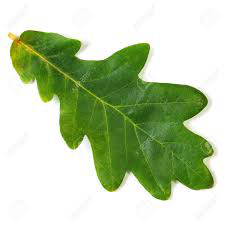

In [38]:
img = PILImage.create(btn_upload.data[-1])
img

In [39]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [40]:
pred, pred_idx, probs = learner_inf.predict(img)

In [41]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: oak; Probability: 0.9997')

In [42]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [43]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    
    pred,pred_idx,probs = learner_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [44]:
btn_upload = widgets.FileUpload()
VBox([widgets.Label('Select your leaf!'), 
      btn_upload, btn_run, out_pl, lbl_pred])